In [ ]:
# 1. Loading Libraries

# Data Management
import pandas as pd

# Mathematical Computation
import numpy as np

# Data Transformation
from scipy.stats import zscore

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Train and Test Split
from sklearn.model_selection import train_test_split

# Sklearn Algorithm Import
from sklearn.ensemble import RandomForestRegressor

# Sklearn Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 2. Loading Dataset
df = pd.read_csv("long_data_.csv")
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
      States Regions   latitude  longitude                Dates  Usage
0     Punjab      NR  31.519974  75.980003  02/01/2019 00:00:00  119.9
1    Haryana      NR  28.450006  77.019991  02/01/2019 00:00:00  130.3
2  Rajasthan      NR  26.449999  74.639981  02/01/2019 00:00:00  234.1
3      Delhi      NR  28.669993  77.230004  02/01/2019 00:00:00   85.8
4         UP      NR  27.599981  78.050006  02/01/2019 00:00:00  313.9


In [ ]:
# 3. Data Summary
print("\nData Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print(f"\nTotal Samples: {len(df)}")


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB
None

Descriptive Statistics:
           latitude     longitude         Usage
count  16599.000000  16599.000000  16599.000000
mean      23.178220     81.794533    103.001862
std        6.146575      7.258429    116.044056
min        8.900373     71.192400      0.300000
25%       19.820430     76.569993      6.700000
50%       23.835404     78.570026     64.400000
75%       27.333330     88.329947    173.900000
max       33.450000     94.216667    522.100000

Total Samples: 16599


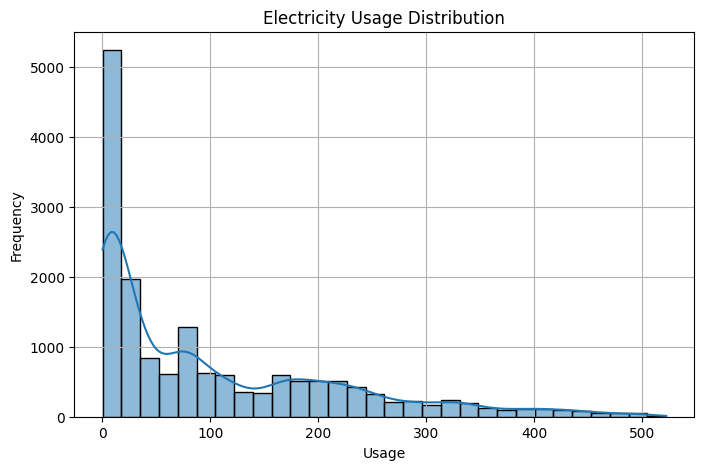

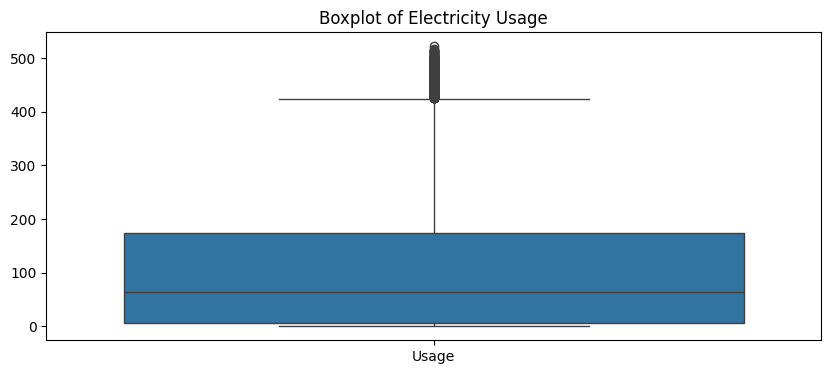

In [ ]:
# 4. Data Visualization

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Usage'], kde=True, bins=30)
plt.title("Electricity Usage Distribution")
plt.xlabel("Usage")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Usage']])
plt.title("Boxplot of Electricity Usage")
plt.show()

In [ ]:
# 5. Data Preprocessing

# Convert 'Dates' to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], dayfirst=True)

# Extract date-time features
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour
df['DayOfWeek'] = df['Dates'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Encode categorical features
le_state = LabelEncoder()
le_region = LabelEncoder()
df['States_encoded'] = le_state.fit_transform(df['States'])
df['Regions_encoded'] = le_region.fit_transform(df['Regions'])

# Select features and target
features = ['latitude', 'longitude', 'Year', 'Month', 'Day', 'Hour',
            'DayOfWeek', 'IsWeekend', 'States_encoded', 'Regions_encoded']
target = 'Usage'

# Handling missing values (if any)
df = df.dropna(subset=features + [target])

# Standardizing features using Z-score
X = df[features]
X_zscore = X.apply(zscore)

# Separate target
y = df[target]

# Display standardized features
print("\nStandardized Features Preview:")
print(X_zscore.head())


Standardized Features Preview:
   latitude  longitude      Year     Month       Day  Hour  DayOfWeek  \
0  1.357179  -0.801097 -0.633336 -1.418611 -1.470575   NaN  -0.499264   
1  0.857704  -0.657813 -0.633336 -1.418611 -1.470575   NaN  -0.499264   
2  0.532309  -0.985719 -0.633336 -1.418611 -1.470575   NaN  -0.499264   
3  0.893496  -0.628878 -0.633336 -1.418611 -1.470575   NaN  -0.499264   
4  0.719408  -0.515902 -0.633336 -1.418611 -1.470575   NaN  -0.499264   

   IsWeekend  States_encoded  Regions_encoded  
0  -0.624102        0.840168        -0.023063  
1  -0.624102       -0.525105        -0.023063  
2  -0.624102        0.945189        -0.023063  
3  -0.624102       -0.945189        -0.023063  
4  -0.624102        1.470294        -0.023063  


In [ ]:
# 6. Split the Dataset (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_zscore, y, test_size=0.2, random_state=42
)

In [ ]:
# 7. Choosing ML Algorithm
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
# 8. Training the Model
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Report
print("=" * 60)
print("Electricity Usage Prediction Report")
print("=" * 60)
print(f"Total Samples Tested    : {len(y_test)}")
print(f"Mean Absolute Error     : {mae:.2f}")
print(f"Mean Squared Error      : {mse:.2f}")
print(f"Root Mean Squared Error : {rmse:.2f}")
print(f"R² Score                : {r2:.4f}")
print("=" * 60)

# Save model
import joblib
joblib.dump(model, "rf_model_electricity.pkl")
# After fitting during training
joblib.dump(le_state, "le_state.pkl")
joblib.dump(le_region, "le_region.pkl")

Electricity Usage Prediction Report
Total Samples Tested    : 3320
Mean Absolute Error     : 10.50
Mean Squared Error      : 409.43
Root Mean Squared Error : 20.23
R² Score                : 0.9700


['le_region.pkl']

In [ ]:
# 9. Inferencing

import pandas as pd
import numpy as np
import joblib

# Load the trained model and encoders
loaded_model = joblib.load("rf_model_electricity.pkl")
le_state = joblib.load("le_state.pkl")
le_region = joblib.load("le_region.pkl")

# Get means and stds from the training data
means = X_train.mean()
stds = X_train.std()

# Check if labels exist in encoders before transforming
state_label = 'Delhi'
region_label = 'NR'

if state_label not in le_state.classes_:
    raise ValueError(f"State '{state_label}' was not seen during training. Available: {list(le_state.classes_)}")
if region_label not in le_region.classes_:
    raise ValueError(f"Region '{region_label}' was not seen during training. Available: {list(le_region.classes_)}")

# Encode the labels
state_encoded = le_state.transform([state_label])[0]
region_encoded = le_region.transform([region_label])[0]

# Define new unseen data
new_data_dict = {
    'latitude': 28.6,
    'longitude': 77.2,
    'Year': 2025,
    'Month': 6,
    'Day': 5,
    'Hour': 14,
    'DayOfWeek': 3,
    'IsWeekend': 0,
    'States_encoded': state_encoded,
    'Regions_encoded': region_encoded
}

# Create DataFrame with same column order as training data
new_data = pd.DataFrame([new_data_dict], columns=means.index)

# Standardize the new data
new_data_standardized = (new_data - means) / stds

# Make prediction
new_prediction = loaded_model.predict(new_data_standardized)

# Show result
print("\nPredicted Electricity Usage for New Data:")
print(f"{new_prediction[0]:.2f}")


Predicted Electricity Usage for New Data:
31.85
